# Pymaceuticals Inc.
---

### Analysis

1. There is an almost even distribution of male mice to female mice, with 51 percent being male and 49 percent being female. This helps ensure the test results are as balanced as possible by sex. 
2. The tumor volume (mm3) for mice on the Capomulin regimen peaks at about 48 (mm3) at 20 days, falls dramatically in volume and bottoms out at around 40 (mm3) at the 35 day mark, then slowly increase from there again. There is a swift rise, and subsequent swift fall in tumor weight over time for the Capomulin regimen.
3. For mice on the Capomulin regimen, there is a clear increase in tumor volume based on mouse weight. In most cases, the heavier the mouse, the heavier the tumor. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
unique_mice_id = combined_data['Mouse ID'].nunique()

unique_mice_id

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

duplicates_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = combined_data.loc[combined_data['Mouse ID'] == 'g989', :]

duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data['Mouse ID'].isin(duplicates_id)==False]

cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_id = cleaned_data['Mouse ID'].nunique()

cleaned_mice_id

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).mean()
median = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).median()
variance = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).var()
standard_deviation = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).std()
sem = cleaned_data['Tumor Volume (mm3)'].groupby(cleaned_data['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                                   "Median Tumor Volume":median, 
                                   "Tumor Volume Variance":variance, 
                                   "Tumor Volume Std. Dev.":standard_deviation, 
                                   "Tumor Volume Std. Err.":sem})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggregation =  cleaned_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Count of Mice per Drug Regimen')

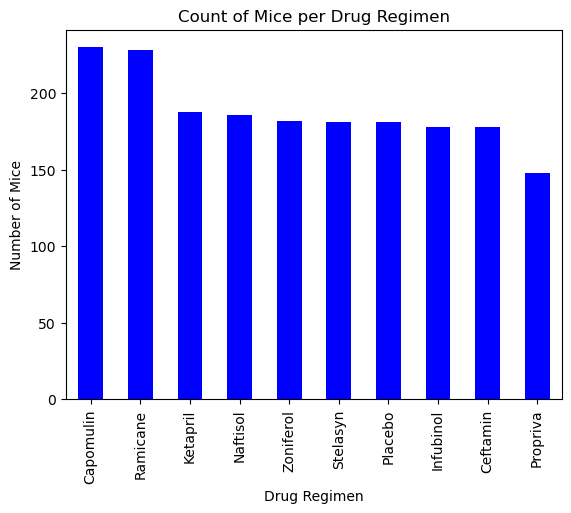

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count_drug_regimen = cleaned_data["Drug Regimen"].value_counts()

plot_pandas = mice_count_drug_regimen.plot.bar(color='b')  

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Count of Mice per Drug Regimen")

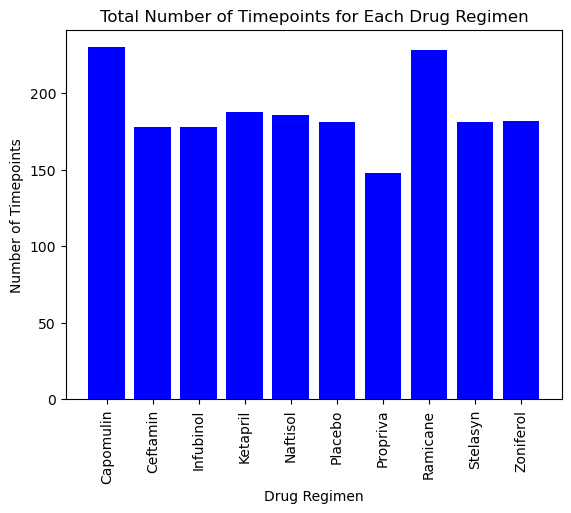

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_count_drug_regimen = cleaned_data.groupby('Drug Regimen')['Timepoint'].count()

plt.bar(mice_count_drug_regimen.index, mice_count_drug_regimen.values, color='b')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xticks(rotation="vertical")

plt.show()

<AxesSubplot:ylabel='Count'>

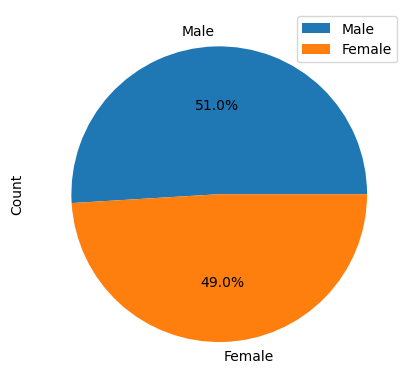

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_data["Sex"].value_counts()
gender_df = pd.DataFrame({"Count": gender_counts})
gender_df.plot.pie(y="Count", autopct="%1.1f%%")

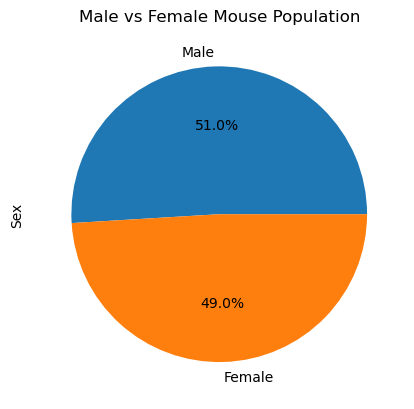

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_counts.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(cleaned_data, last_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')

In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_volume = last_timepoint_data.loc[last_timepoint_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volume)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for value in range(len(treatments)):
    quartiles = tumor_volume_data[value].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq   
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume_data[value][(tumor_volume_data[value] < lower_bound) | (tumor_volume_data[value] > upper_bound)]
    
    print(f"{treatments[value]}'s potential outliers: {outliers}") 

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


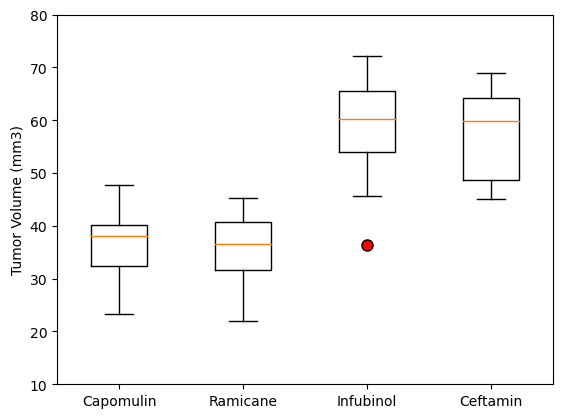

In [28]:
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
ax1.set_ylabel('Tumor Volume (mm3)')
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

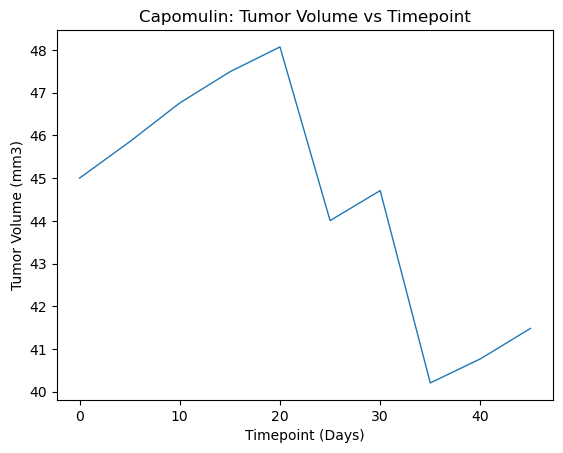

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin",:]

forline_df = capomulin_data.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin: Tumor Volume vs Timepoint')
plt.plot(x_axis, tumsiz,linewidth=1, markersize=15, label = "Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

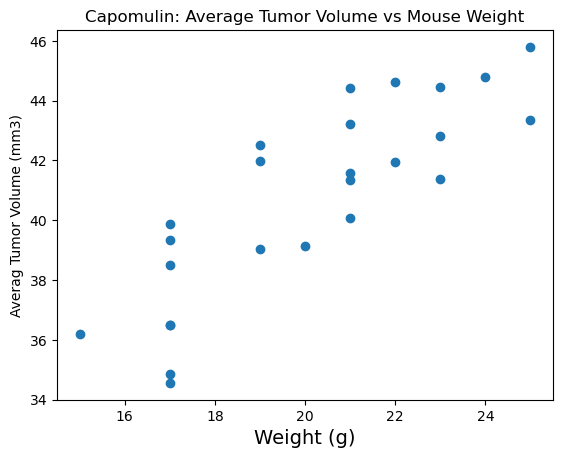

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avgerage_capomulin_volume = capomulin_data.groupby(['Mouse ID']).mean()

marker_size = 15
plt.scatter(avgerage_capomulin_volume['Weight (g)'],avgerage_capomulin_volume['Tumor Volume (mm3)'])
plt.title('Capomulin: Average Tumor Volume vs Mouse Weight')
plt.xlabel('Weight (g)',fontsize = 14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen
capomulin_correlation = st.pearsonr(avgerage_capomulin_volume['Weight (g)'],avgerage_capomulin_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(capomulin_correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


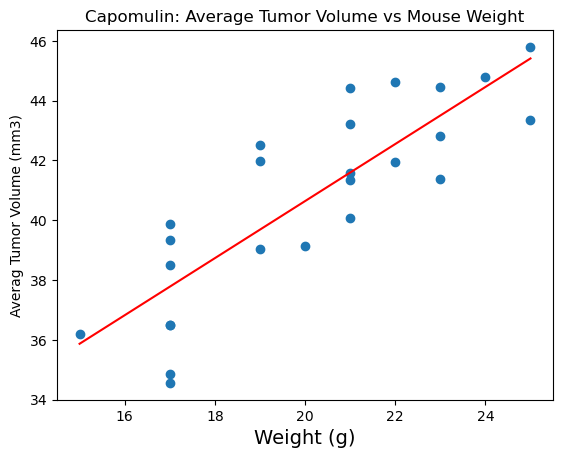

In [40]:
# Add the linear regression equation and line to the above 'Capomulin: Average Tumor Volume vs Mouse Weight' line plot. 
slope, intercept = np.polyfit(avgerage_capomulin_volume['Weight (g)'], avgerage_capomulin_volume['Tumor Volume (mm3)'], 1)

fig1, ax1 = plt.subplots()
marker_size = 15
plt.scatter(avgerage_capomulin_volume['Weight (g)'], avgerage_capomulin_volume['Tumor Volume (mm3)'])
plt.title('Capomulin: Average Tumor Volume vs Mouse Weight')
plt.xlabel('Weight (g)',fontsize = 14)
plt.ylabel('Averag Tumor Volume (mm3)')

x_values = np.linspace(avgerage_capomulin_volume['Weight (g)'].min(), avgerage_capomulin_volume['Weight (g)'].max(), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='r')